## Day 19 NULL

### Data

- 

C:\dev\conda3\envs\geopy2020\lib\site-packages\contextily\tile.py:353: RasterioDeprecationWarning: Source dataset should be opened in read-only mode. Use of datasets opened in modes other than 'r' will be disallowed in a future version.
  img.transpose(2, 0, 1), transform, "EPSG:3857", t_crs, resampling


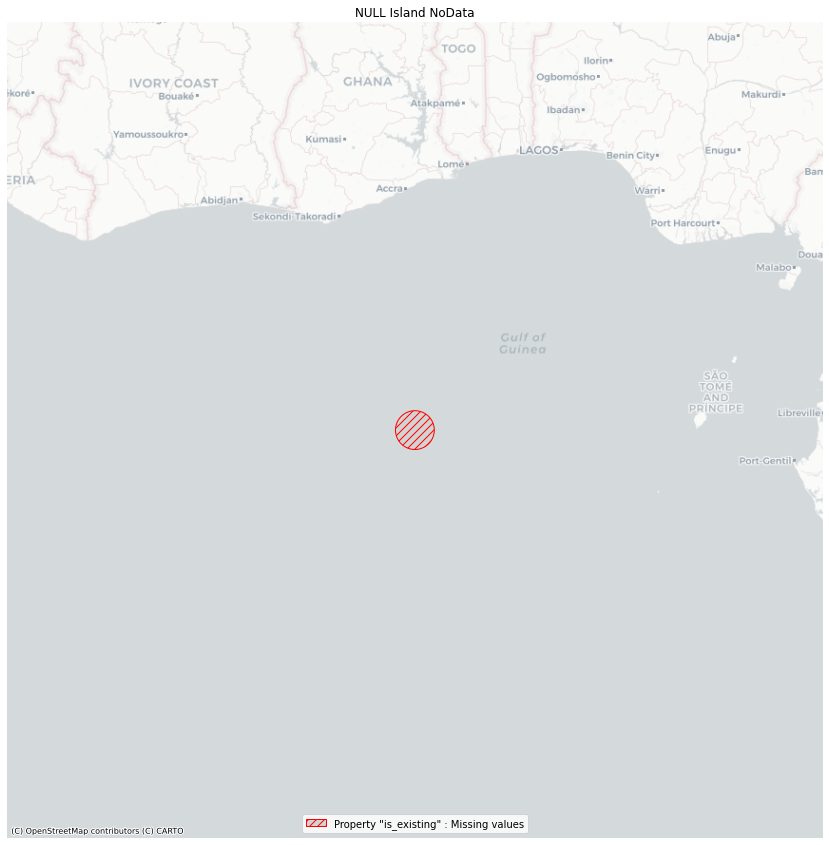

In [42]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import collections

import contextily as cx

null_island_p = gpd.GeoDataFrame(pd.DataFrame( { 'name': ['Null Island'], 'is_existing': [np.nan], 'geometry': [ Point(0, 0) ] } ), geometry='geometry', crs=4326).to_crs(3857)
null_island_p['geometry'] = null_island_p.geometry.buffer(50000)


# fig = plt.figure()
# ax.set_title("Distribution of recorded specimen of Centaurea Cyanus, the Blue Cornflower, in Estonia", fontsize=18)
# plt.savefig("../source/_static/day-05-blue.png", bbox_inches='tight')

fig, ax = plt.subplots(1, figsize=(18, 15))

xlim = ([null_island_p.total_bounds[0] - 1000000,  null_island_p.total_bounds[2] + 1000000])
ylim = ([null_island_p.total_bounds[1] - 1000000,  null_island_p.total_bounds[3] + 1000000])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

nodata_kwds = missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values"
    }

null_island_p.plot(ax=ax, column="is_existing", missing_kwds=nodata_kwds)


patchList = []

data_key = mpatches.Patch(facecolor="lightgrey", edgecolor="red", hatch = "///", label= "Property \"is_existing\" : Missing values")

patchList.append(data_key)

plt.legend(handles=patchList, loc='lower center')

cx.add_basemap(ax, crs=null_island_p.crs.to_string(), source=cx.providers.CartoDB.Positron)

ax.set_axis_off()

plt.title('NULL Island NoData')

plt.show()
fig.savefig('../source/_static/day-19-null.png', bbox_inches='tight')